In [9]:
#Unique
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('All_Total_Age.csv')
print(df)

df = df[['Country', 'MEA', 'Value']]
print(df)

     LOCATION    Country  MEA           Overall_Measure  VAR  \
0         AUS  Australia   EQ          Earnings quality    3   
1         AUS  Australia   EQ          Earnings quality    3   
2         AUS  Australia   EQ          Earnings quality    3   
3         AUS  Australia   EQ          Earnings quality    3   
4         AUS  Australia   EQ          Earnings quality    3   
...       ...        ...  ...                       ...  ...   
6111      LVA     Latvia  LMI  Labour market insecurity    2   
6112      LVA     Latvia  LMI  Labour market insecurity    2   
6113      LVA     Latvia  LMI  Labour market insecurity    2   
6114      LVA     Latvia  LMI  Labour market insecurity    2   
6115      LVA     Latvia  LMI  Labour market insecurity    2   

                                             Components    POP  \
0     Earnings quality (in constant prices, at const...     TP   
1     Earnings quality (in constant prices, at const...     TP   
2     Earnings quality (in consta

MEA    Country         EQ       LMI        QWE
0    Australia  21.584231  3.010338  27.134966
1      Austria  22.270502  1.719994  31.301494
2      Belgium  28.963541  2.838172  31.048147
3       Canada  18.563933  3.709338  30.839705
4        Chile   6.232999  7.497442  28.000135


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

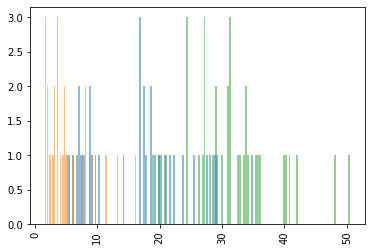

In [10]:
df_new = df.pivot_table(values = 'Value', index = 'Country', columns = 'MEA')
df_new.reset_index(inplace=True)
print(df_new.head())
#df1 = df_new.iloc[:, 0].to_numpy()
df2 = df_new.iloc[:, 1].to_numpy()
df3 = df_new.iloc[:, 2].to_numpy()
df4 = df_new.iloc[:, 3].to_numpy()



#plt.hist(df1, bins=100, alpha=0.5, label="data1")
plt.hist(df2, bins=100, alpha=0.5, label="data2")
plt.hist(df3, bins=100, alpha=0.5, label="data3")
plt.hist(df4, bins=100, alpha=0.5, label="data4")
plt.xticks(rotation = 'vertical')

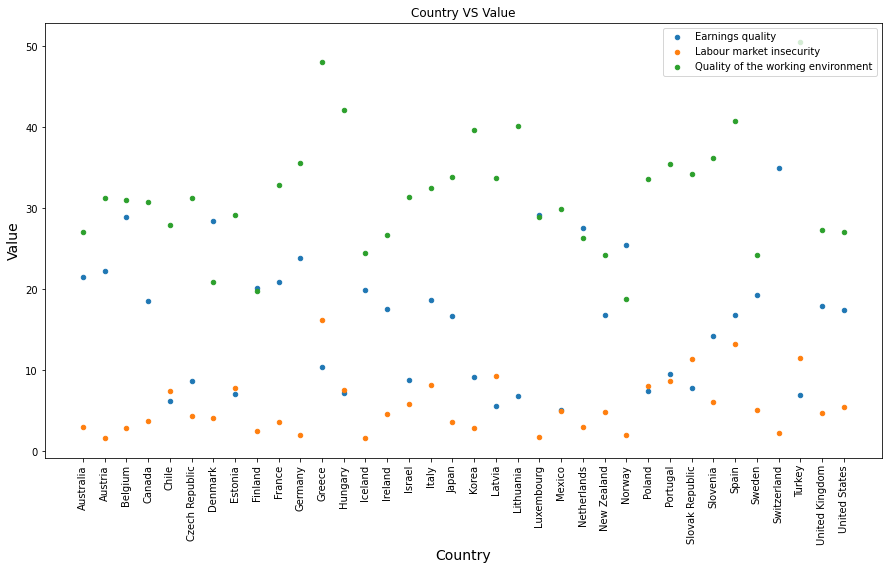

In [11]:
#Scatter plot
df1 = df_new.iloc[:, 0].to_numpy()
df2 = df_new.iloc[:, 1].to_numpy()
df3 = df_new.iloc[:, 2].to_numpy()


ax = df_new.plot(kind="scatter", x = "Country", y = "EQ", c = 'C0', label="Earnings quality", figsize=(15, 8))
df_new.plot(kind="scatter", x = "Country", y = "LMI", c = 'C1',  label="Labour market insecurity", ax = ax)
df_new.plot(kind="scatter", x = "Country", y = "QWE",  c = 'C2',label="Quality of the working environment", ax = ax)

plt.xlabel("Country", size=14)
plt.ylabel("Value", size=14)
plt.title("Country VS Value")
plt.legend(loc='upper right')
plt.xticks(rotation = 'vertical')
plt.savefig('scatterplot_Job_Quality.jpeg', bbox_inches='tight')
plt.show()




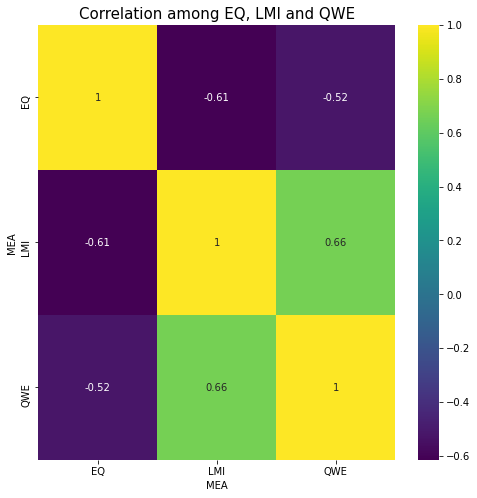

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
#X = df.drop(columns=['Country'])  #independent columns
#y = df['StateAnxiety']    #target column
#get correlations of each features in dataset
corrmat = df_new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
plt.xlabel('Measures')
plt.ylabel('Measures')
plt.yticks(rotation='horizontal')
#plot heat map
g=sns.heatmap(df_new[top_corr_features].corr(),annot=True,cmap="viridis")
plt.title('Correlation among EQ, LMI and QWE', fontsize=15)
plt.savefig('heatmap_Job_Quality.jpeg', bbox_inches='tight')